In [172]:
import pandas as pd

In [173]:
df= pd.read_csv(r'C:\Users\carol\OneDrive\Desktop\proyecto1\SampleSuperstore.csv', delimiter=';')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity_prodt,Discount,Profit
0,Second Class,Consumer,United States,Los Angeles,California,90049,West,Technology,Accessories,"$ 90,57",3,20,"$ 117.741,00"
1,First Class,Corporate,United States,Eagan,Minnesota,55122,Central,Technology,Accessories,"$ 45,98",2,0,"$ 197.714,00"
2,Standard Class,Consumer,United States,Dover,Delaware,19901,East,Technology,Accessories,"$ 45,00",3,0,"-$ 4,95"
3,First Class,Consumer,United States,Troy,New York,12180,East,Technology,Accessories,"$ 30,00",2,0,"$ 3,30"
4,Standard Class,Consumer,United States,Los Angeles,California,90004,West,Technology,Accessories,"$ 13,98",2,0,"$ 61.512,00"


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ship Mode       9994 non-null   object 
 1   Segment         9994 non-null   object 
 2   Country         9994 non-null   object 
 3   City            9994 non-null   object 
 4   State           9994 non-null   object 
 5   Postal Code     9994 non-null   float64
 6   Region          9994 non-null   object 
 7   Category        9994 non-null   object 
 8   Sub-Category    9994 non-null   object 
 9   Sales           9994 non-null   object 
 10  Quantity_prodt  9994 non-null   float64
 11  Discount        9994 non-null   float64
 12  Profit          9994 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1015.2+ KB


In [175]:
# Remove unwanted characters (example: commas and currency symbols)
df['Sales'] = df['Sales'].str.replace(',', '').str.replace('$', '') # deleted commas and symbol dolar

# Convert 'Sales' column to numeric
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Now, round the 'Sales' column to two decimal places
df['Sales'] = df['Sales'].round(2)

# Check for NaN values after cleaning and conversion
print(df['Sales'].isnull().sum())

439


In [176]:
# Replacing NaN whit 0
df['Discount'] = df['Discount'].fillna(0) 

#covert a int
df['Discount'] = df['Discount'].astype(int)

# Check for NaN values after cleaning and conversion
print(df['Discount'].dtypes)




int32


In [177]:
# Assuming 'Profit' originally contains values as text strings
df['Profit'] = df['Profit'].astype(str) # Making sure it is treated as text
df['Profit'] = df['Profit'].str.replace('[^\d.-]', '', regex=True) # Remove everything except digits, negative sign and decimal point
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce') # Convert to numeric


# Now, round the 'Profit' column to two decimal places
df['Profit'] = df['Profit'].round(2)

# Check for NaN values after cleaning and conversion
print(df['Profit'].isnull().sum())


710


In [178]:
#Make sure there are no NaNs in the 'Postal Code' column by replacing them with 0
# (or any other integer value you consider appropriate)
df['Postal Code'] = df['Postal Code'].fillna(0)

# Now, converting 'Postal Code' to integer type
df['Postal Code'] = df['Postal Code'].astype(int)


In [179]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ship Mode       9994 non-null   object 
 1   Segment         9994 non-null   object 
 2   Country         9994 non-null   object 
 3   City            9994 non-null   object 
 4   State           9994 non-null   object 
 5   Postal Code     9995 non-null   int32  
 6   Region          9994 non-null   object 
 7   Category        9994 non-null   object 
 8   Sub-Category    9994 non-null   object 
 9   Sales           9556 non-null   float64
 10  Quantity_prodt  9994 non-null   float64
 11  Discount        9995 non-null   int32  
 12  Profit          9285 non-null   float64
dtypes: float64(3), int32(2), object(8)
memory usage: 937.2+ KB
None
        Ship Mode    Segment        Country         City       State  \
0    Second Class   Consumer  United States  Los Angeles  California   
1    

In [180]:
# Now when you use describe, the results will have 2 decimal places
print(df.describe().round(2))

       Postal Code  Sales  Quantity_prodt  Discount  Profit
count         9995   9556            9994      9995    9285
mean         55185   7913               4        16     400
std          32067  16219               2        21    3722
min              0      1               1         0  -93828
25%          23223     56               2         0       8
50%          56301   1056               3        20      53
75%          90008   6578               5        20     194
max          99301  99998              14        80   79080


In [182]:
# Correlation between numeric columns
columns_numeric = ['Sales', 'Quantity_prodt', 'Discount', 'Profit']
print(df[columns_numeric].corr())



                Sales  Quantity_prodt  Discount  Profit
Sales               1               0        -0       0
Quantity_prodt      0               1         0       0
Discount           -0               0         1      -0
Profit              0               0        -0       1


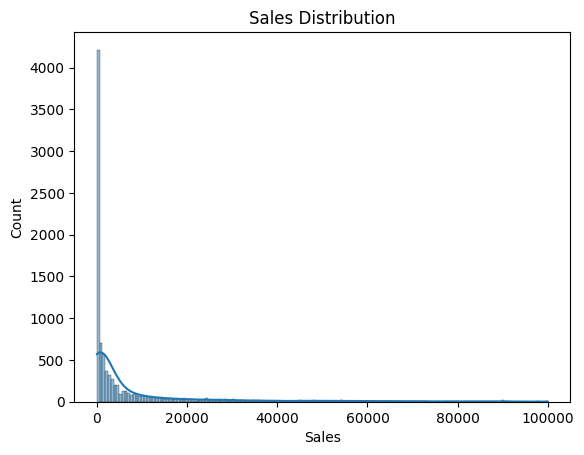

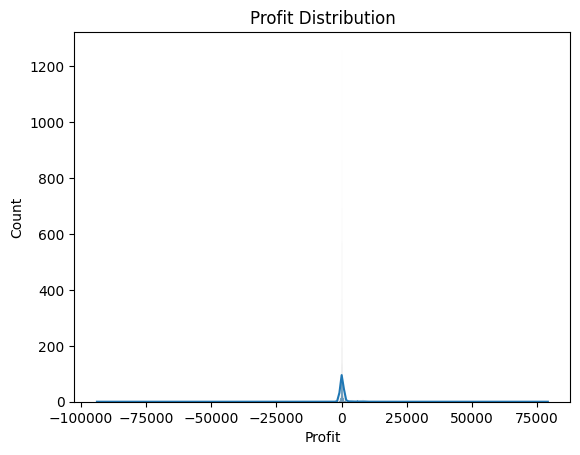

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales histogram
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

# Profit histogram
sns.histplot(df['Profit'], kde=True)
plt.title('Profit Distribution')
plt.show()

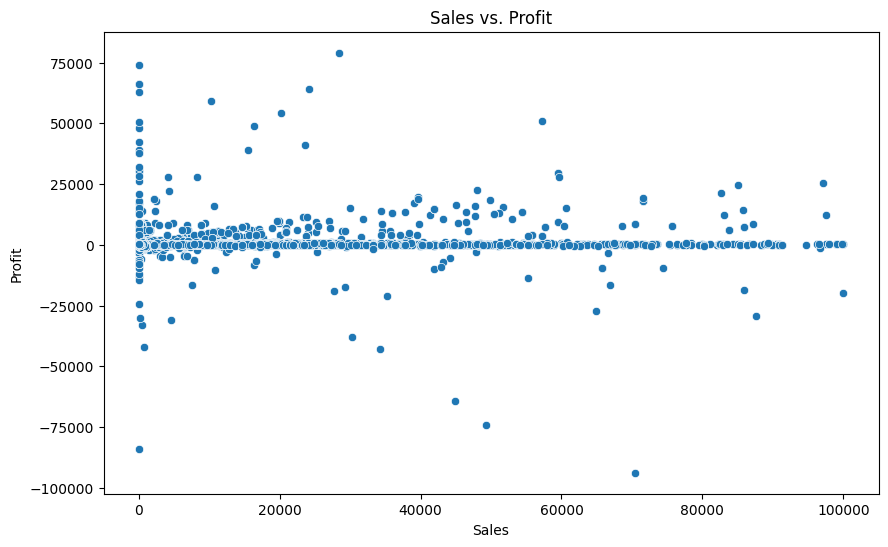

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales vs. Scatter Chart benefit
plt.figure(figsize=(10, 6)) # Chart size
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit') # Chart title
plt.xlabel('Sales') # X axis label
plt.ylabel('Profit') # Y axis label
plt.show()

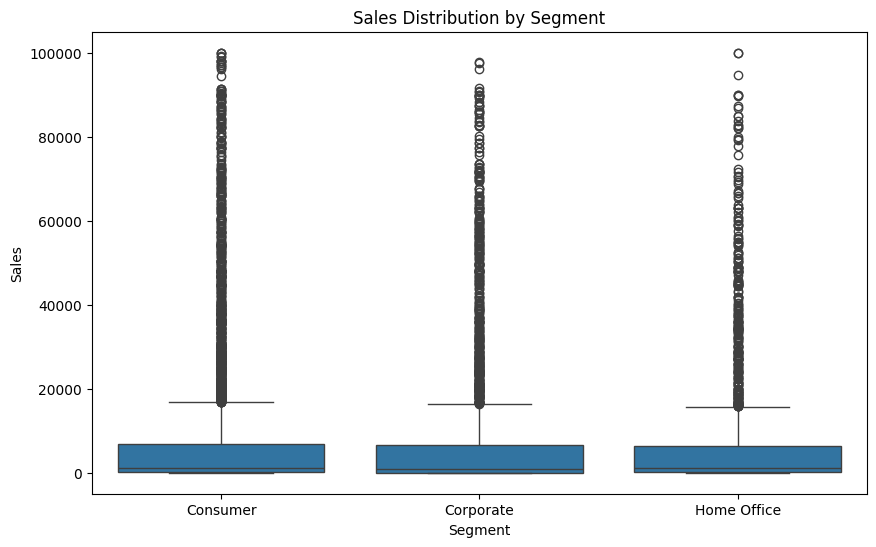

In [185]:
plt.figure(figsize=(10, 6)) # Chart size
sns.boxplot(x='Segment', y='Sales', data=df)
plt.title('Sales Distribution by Segment') # Chart title
plt.xlabel('Segment') # X axis label
plt.ylabel('Sales') # Y axis label
plt.show()

In [186]:
pd.set_option('display.float_format', '{:.0f}'.format)

# Group by country, city and state and add sales
sales_by_country_city_state = df.groupby(['Country', 'City', 'State'])['Sales'].sum().reset_index()

# Sort the results by sales from highest to lowest
sales_by_country_city_state = sales_by_country_city_state.sort_values(by='Sales', ascending=False)

# Show the first records to see the cities with the most sales
sales_by_country_city_state.head()

,Country,City,State,Sales
380,United States,New York City,New York,8012172
312,United States,Los Angeles,California,6105363
517,United States,Seattle,Washington,3632069
503,United States,San Francisco,California,3168214
143,United States,Detroit,Michigan,1957034


In [188]:
pd.set_option('display.float_format', '{:.0f}'.format)

# Group by country and add sales
sales_by_country = df.groupby(['Country','Category',])['Sales'].sum().reset_index()

# Sort the results by sales from highest to lowest
sales_by_country = sales_by_country.sort_values(by='Sales', ascending=False)

# Show the first records to see the cities with the most sales
sales_by_country.head()

,Country,Category,Sales
1,United States,Office Supplies,31876909
2,United States,Technology,23701266
0,United States,Furniture,20034551


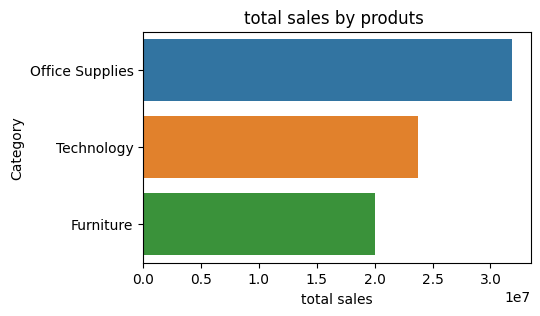

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar las ventas por producto para la visualización
sales_by_country_sorted = sales_by_country.sort_values('Sales', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))  # Ajusta el tamaño del gráfico según necesites
sns.barplot(x='Sales', y='Category', data=sales_by_country_sorted, hue='Category')

# Añadir títulos y etiquetas
plt.title('total sales by produts ')
plt.xlabel('total sales')
plt.ylabel('Category')

# Mostrar el gráfico
plt.show()

In [141]:
pd.set_option('display.float_format', '{:.0f}'.format)

# Group by city and add sales
sales_city = df.groupby(['City'])['Sales'].count().reset_index()

# Sort the results by sales from highest to lowest
sales_city = sales_city.sort_values(by='Sales', ascending=False)

# Show the first records to see the cities with the most sales
sales_city.head()

,City,Sales
329,New York City,867
266,Los Angeles,706
374,Philadelphia,517
438,San Francisco,478
452,Seattle,409


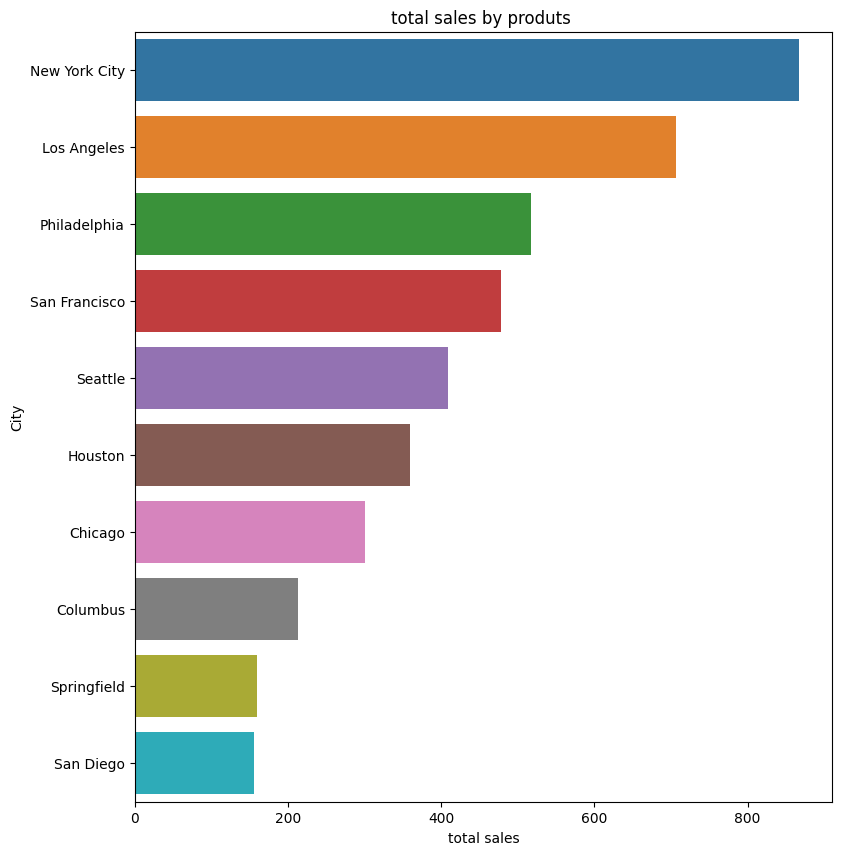

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar las ventas por producto para la visualización
sales_city_sorted = sales_city.sort_values('Sales', ascending=False)

#result top 10
sales_city_sorted_top10 = sales_city_sorted.head(10)
# Crear un gráfico de barras
plt.figure(figsize=(9, 10))  # Ajusta el tamaño del gráfico según necesites
sns.barplot(x='Sales', y='City', data=sales_city_sorted_top10, hue='City')

# Añadir títulos y etiquetas
plt.title('total sales by produts ')
plt.xlabel('total sales')
plt.ylabel('City')

# Mostrar el gráfico
plt.show()

In [192]:
pd.set_option('display.float_format', '{:.0f}'.format)

# Group by state and add sales
sales_state = df.groupby(['State'])['Sales'].mean().reset_index()

# Sort the results by sales from highest to lowest
sales_state = sales_state.sort_values(by='Sales', ascending=False)

# Show the first records to see the cities with the most sales
sales_state.head()

,State,Sales
34,Oklahoma,17056
15,Kentucky,16986
47,Wisconsin,16818
38,South Carolina,16397
0,Alabama,16036


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar las ventas por producto para la visualización
sales_state_sorted = sales_state.sort_values('Sales', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(9, 10))  # Ajusta el tamaño del gráfico según necesites
sns.barplot(x='Sales', y='State', data=sales_state_sorted, hue='State')

# Añadir títulos y etiquetas
plt.title('total sales by produts ')
plt.xlabel('total sales')
plt.ylabel('State')

# Mostrar el gráfico
plt.show()

In [146]:
# Group by product category and subcategory and add sales
sales_by_product = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Sort the results by sales from highest to lowest
sales_by_product = sales_by_product.sort_values(by='Sales', ascending=False)

# Show the first records to see the products with the most sales
sales_by_product.head()

,Category,Sub-Category,Sales
16,Technology,Phones,11759575
11,Office Supplies,Storage,11704413
13,Technology,Accessories,9344423
1,Furniture,Chairs,7289916
2,Furniture,Furnishings,6277054


In [150]:
sales_by_product = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
sales_by_product.head()

,Category,Sub-Category,Sales
0,Furniture,Bookcases,2242107
1,Furniture,Chairs,7289916
2,Furniture,Furnishings,6277054
3,Furniture,Tables,4225475
4,Office Supplies,Appliances,4943689
